# Spatial Operations in Image Processing

In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png 

--2022-08-30 12:21:54--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7243 (7.1K) [image/jpeg]
Saving to: ‘cameraman.jpeg.3’

cameraman.jpeg.3    100%[===================>]   7.07K  --.-KB/s    in 0s      

2022-08-30 12:22:05 (1.02 GB/s) - ‘cameraman.jpeg.3’ saved [7243/7243]

--2022-08-30 12:22:05--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cl

In [2]:
# Used to view the images
import matplotlib.pyplot as plt
# Used to load an image
from PIL import Image
# Used to create kernels for filtering
import numpy as np

In [3]:
def plot_image(image_1, image_2, title_1='Original', title_2='New Image'):
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(image_1)
    plt.title(title_1)
    plt.subplot(1,2,2)
    plt.imshow(image_2)
    plt.title(title_2)
    plt.show()

## Linear Filtering

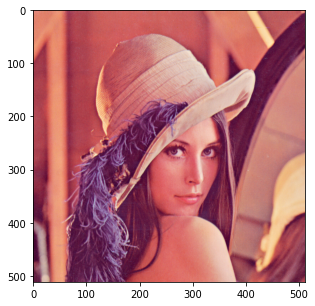

In [4]:
# Loads the image from the specified file
image = Image.open('lenna.png')
# Renders the image
plt.figure(figsize=(5,5))
plt.imshow(image)
plt.show()

In [6]:
# Get the number of rows and columns in the image
rows, cols = image.size
# Creates values using a normal distribution with a mean of 0 and standard deviation of 15, the values are converted to unit8 which means the values are between 0 and 255
noise = np.random.normal(0, 15, (rows, cols, 3)).astype(np.uint8)
# Add the noise to the image
noisy_image = image + noise
# Creates a PIL Image from an array
noisy_image = Image.fromarray(noisy_image)
# Plots the original image and the image with noise using the function defined at the top
plot_image(image, noisy_image, title_1='Original', title_2='Image Plus Noise')

## Filtering Noise

In [8]:
from PIL import ImageFilter

In [9]:
# Create a kernel which is a 5 by 5 array where each value is 1/36
kernel = np.ones((5,5))/36
# Create a ImageFilter Kernel by providing the kernel size and a flattened kernel
kernel_filter = ImageFilter.Kernel((5,5), kernel.flatten())

In [10]:
# Filters the images using the kernel
image_filtered = noisy_image.filter(kernel_filter)

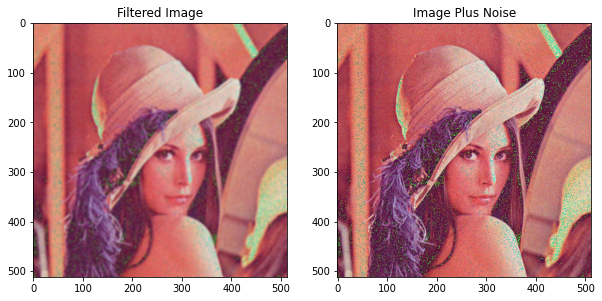

In [11]:
# Plots the Filtered and Image with Noise using the function defined at the top
plot_image(image_filtered, noisy_image, title_1='Filtered Image', title_2='Image Plus Noise')

In [12]:
# Create a kernel which is a 3 by 3 array where each value is 1/36
kernel = np.ones((3,3))/36
# Create a ImageFilter Kernel by providing the kernel size and a flattened kernel
kernel_filter = ImageFilter.Kernel((3,3), kernel.flatten())
# Filters the images using the kernel
image_filtered = noisy_image.filter(kernel_filter)
# Plots the Filtered and Image with Noise using the function defined at the top
plot_image(image_filtered, noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

## Gaussian Blur

In [13]:
# Filters the images using GaussianBlur
image_filtered = noisy_image.filter(ImageFilter.GaussianBlur)
# Plots the Filtered Image then the Unfiltered Image with Noise
plot_image(image_filtered, noisy_image, title_1='Filtered image', title_2='Image Plus Noise')

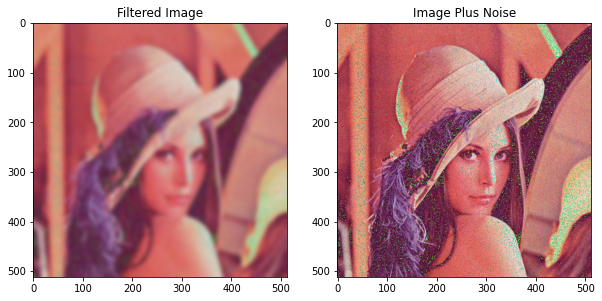

In [14]:
# Filters the images using GaussianBlur on the image with noise using a 4 by 4 kernel 
image_filtered = noisy_image.filter(ImageFilter.GaussianBlur(4))
# Plots the Filtered Image then the Unfiltered Image with Noise
plot_image(image_filtered, noisy_image, title_1='Filtered Image', title_2='Image Plus Noise')

## Image Sharpening

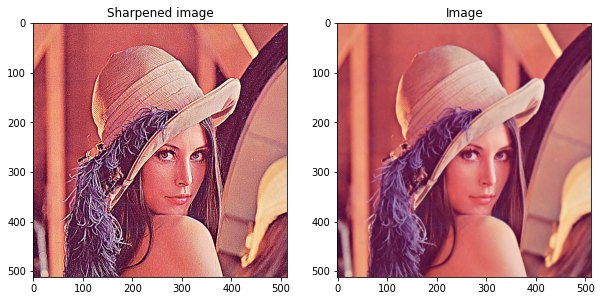

In [15]:
# Common Kernel for image sharpening
kernel = np.array([[-1,-1,-1],
                  [-1, 9, -1],
                  [-1, -1, -1]])
kernel = ImageFilter.Kernel((3,3), kernel.flatten())
# Applys the sharpening filter using kernel on the original image without noise
sharpened = image.filter(kernel)
# Plots the sharpened image and the original image without noise
plot_image(sharpened, image, title_1='Sharpened image', title_2='Image')

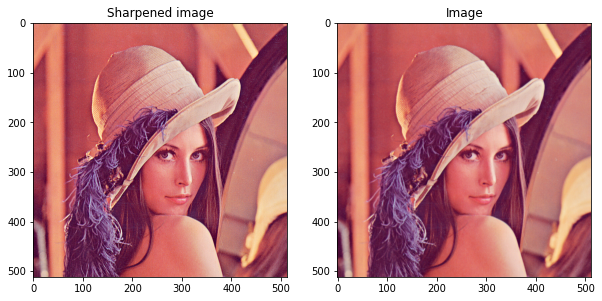

In [17]:
# Sharpends image using predefined image filter from PIL
sharpened = image.filter(ImageFilter.SHARPEN)
# Plots the sharpened image and the original image without noise
plot_image(sharpened, image, title_1='Sharpened image', title_2='Image')

## Edges

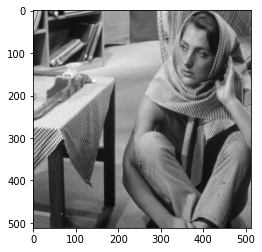

In [18]:
# Loads the image from the specified file
img_gray = Image.open('barbara.png')
# Renders the image from the array of data, notice how it is 2 diemensional instead of 3 diemensional because it has no color
plt.imshow(img_gray, cmap='gray')

In [19]:
# Filters the images using EDGE_ENHANCE filter
img_gray = img_gray.filter(ImageFilter.EDGE_ENHANCE)
# Renders the enhanced image
plt.figure(figsize=(10,10))
plt.imshow(img_gray, cmap='gray')

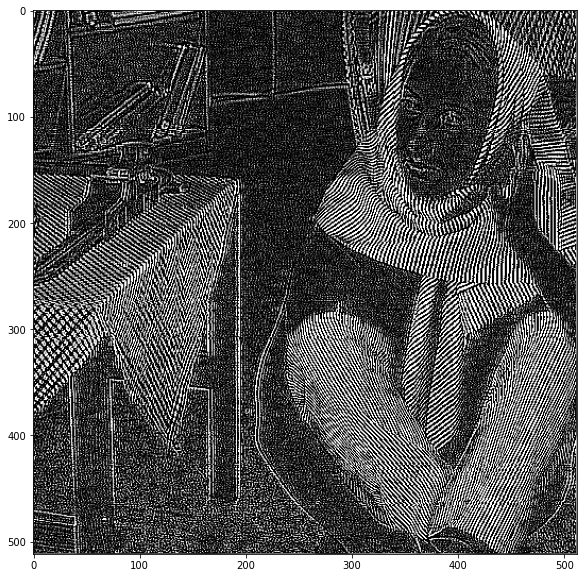

In [20]:
# Filters the images using FIND_EDGES filter
img_gray = img_gray.filter(ImageFilter.FIND_EDGES)
# Renders the filtered image
plt.figure(figsize=(10,10))
plt.imshow(img_gray, cmap='gray')

## Median

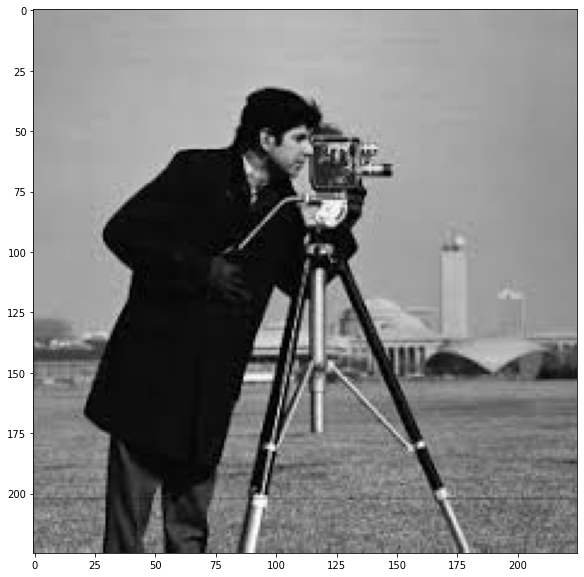

In [21]:
# Load the camera man image
image = Image.open('cameraman.jpeg')
# Make the image larger when it renders
plt.figure(figsize=(10,10))
# Renders the image
plt.imshow(image, cmap='gray')

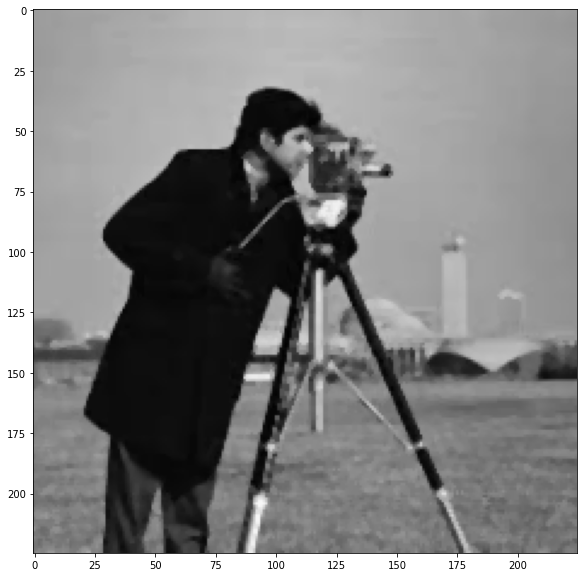

In [22]:
image = image.filter(ImageFilter.MedianFilter)
plt.figure(figsize=(10,10))
# Renders the image
plt.imshow(image, cmap='gray')